# Airbus Ship-Data 

Source: Architecting ML on AWS: 

Write-Up:https://github.com/aws-samples/amazon-sagemaker-architecting-for-ml/blob/master/Writeups/Object%20Detection.md 
Starter Code: https://github.com/aws-samples/amazon-sagemaker-architecting-for-ml/blob/master/Starter-Code/ship-data-transformation.ipynb

In [1]:
#hide
!pip install -Uqq fastbook
!pip install fastcore==1.0.12 #This right here
import fastbook
fastbook.setup_book()

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/JupyterSystemEnv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# #hide
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [21]:
#hide
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path

# From Model to Production

## Gathering Data

Download Dataset from Kaggle. (Create an account, Create API key, download kaggle.json to this instance, accept Kaggle Terms). 
The dataset is 30GB zip file. Make sure you increase EBS volume size to 100+

## Test Downloaded Image


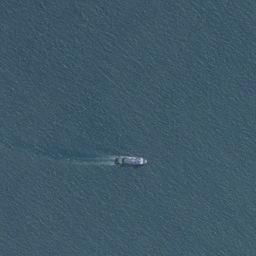

In [3]:
im = Image.open('images/ship-data/train_v2/000155de5.jpg')
im.to_thumb(256,256)

## From Data to DataLoaders

In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


### Split Training Data into ShipYes/ShipNo Folders

In [5]:
masks = pd.read_csv('./images/ship-data/train_ship_segmentations_v2.csv')
print(masks.shape[0], 'masks found')
print(masks['ImageId'].value_counts().shape[0])
masks.head(3)

231723 masks found
192556


,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971...


### Prepare Folder of Images with Ships

In [6]:
images_with_ship = masks.ImageId[masks.EncodedPixels.isnull()==False]
images_with_ship = np.unique(images_with_ship.values)
print('There are ' +str(len(images_with_ship)) + ' image files with masks')


There are 42556 image files with masks


In [7]:
images_with_ship

array(['000155de5.jpg', '000194a2d.jpg', '00021ddc3.jpg', ..., 'fffcb6464.jpg', 'fffd924fb.jpg', 'fffdd2377.jpg'], dtype=object)

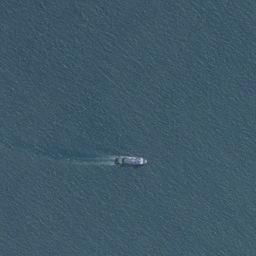

In [8]:
im = Image.open('images/ship-data/train_v2/'+ images_with_ship[0])
im.to_thumb(256,256)

In [ ]:
import shutil
import os

maxfiles = 5000
dirname = 'train-s' + str(maxfiles)
os.mkdir ('./images/ship-data/' + dirname)
os.mkdir ('./images/ship-data/' + dirname + '/shipyes')

count = 0
while count < maxfiles:
    print(images_with_ship[count])
    shutil.copy2('./images/ship-data/train_v2/' + images_with_ship[count], './images/ship-data/'+ dirname)
    count += 1

In [103]:
path = Path('./images/ship-data/'+ dirname)
path

Path('images/ship-data/train-s5000')

In [104]:
fnames = get_image_files(path)

In [105]:
fnames

(#5000) [Path('images/ship-data/train-s5000/shipyes/0eba89c17.jpg'),Path('images/ship-data/train-s5000/shipyes/07605d36c.jpg'),Path('images/ship-data/train-s5000/shipyes/13abc04bd.jpg'),Path('images/ship-data/train-s5000/shipyes/0be0e552f.jpg'),Path('images/ship-data/train-s5000/shipyes/1c934bf95.jpg'),Path('images/ship-data/train-s5000/shipyes/08f0d8a6d.jpg'),Path('images/ship-data/train-s5000/shipyes/04d06cdf1.jpg'),Path('images/ship-data/train-s5000/shipyes/0865d8170.jpg'),Path('images/ship-data/train-s5000/shipyes/063c4aa67.jpg'),Path('images/ship-data/train-s5000/shipyes/0cab4df4b.jpg')...]

### Prepare Folder od Images without Ships

In [106]:
images_without_ship = masks.ImageId[masks.EncodedPixels.isnull()==True]
images_without_ship = np.unique(images_without_ship.values)
print('There are ' +str(len(images_without_ship)) + ' image files with NO masks')


images_without_ship

There are 150000 image files with NO masks


array(['00003e153.jpg', '0001124c7.jpg', '0001b1832.jpg', ..., 'ffff6e525.jpg', 'ffffc50b4.jpg', 'ffffe97f3.jpg'], dtype=object)

In [113]:

maxfiles = 5000
os.mkdir ('./images/ship-data/' + dirname + '/shipno')

count = 0
while count < maxfiles:
    print(images_without_ship[count])
    shutil.copy2('./images/ship-data/train_v2/' + images_without_ship[count], './images/ship-data/'+ dirname + '/shipno')
    count += 1

00003e153.jpg
0001124c7.jpg
0001b1832.jpg
0002d0f32.jpg
000303d4d.jpg
00052ed46.jpg
00057a50d.jpg
000592296.jpg
0007b8229.jpg
000805313.jpg
000811bb6.jpg
0008d6216.jpg
000913daf.jpg
000952d51.jpg
000969125.jpg
0009a46e1.jpg
000a4d4fd.jpg
000aed819.jpg
000baef0c.jpg
000bd9ac4.jpg
000c150b0.jpg
000c34352.jpg
000d26c17.jpg
000db3e62.jpg
000e37fc6.jpg
000e64855.jpg
000f1f959.jpg
000f7e728.jpg
000f7f2fd.jpg
00104f16f.jpg
0010e88ce.jpg
0010eefb1.jpg
00119e4ba.jpg
0011a9ccb.jpg
0011c31b7.jpg
00122061c.jpg
0012669a8.jpg
0012a8fa1.jpg
0012b8981.jpg
0012be3bb.jpg
0013b2222.jpg
00140e597.jpg
0014b1235.jpg
0015a4f8b.jpg
00160335a.jpg
00167446e.jpg
0016a2ab9.jpg
0016ae695.jpg
0016bc1a8.jpg
0016c1d02.jpg
001739657.jpg
001768e84.jpg
001883b1b.jpg
00189cc36.jpg
0018f7728.jpg
0019444bc.jpg
001948368.jpg
00196e715.jpg
0019880c1.jpg
001a7cba8.jpg
001ac9fa5.jpg
001ae1b37.jpg
001b9e692.jpg
001bfb70a.jpg
001c73c42.jpg
001db1e48.jpg
001db5968.jpg
001dd855d.jpg
001e3f475.jpg
001ea610a.jpg
001f04ca3.jpg
001f3c

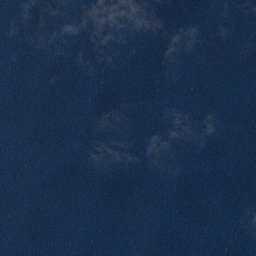

In [114]:
im = Image.open('images/ship-data/train_v2/'+ images_without_ship[0])
im.to_thumb(256,256)

In [115]:
fnames = get_image_files(path)
fnames

(#10000) [Path('images/ship-data/train-s5000/shipno/07987cdc3.jpg'),Path('images/ship-data/train-s5000/shipno/00fb4ec4c.jpg'),Path('images/ship-data/train-s5000/shipno/038163f7c.jpg'),Path('images/ship-data/train-s5000/shipno/025cf3713.jpg'),Path('images/ship-data/train-s5000/shipno/0824370da.jpg'),Path('images/ship-data/train-s5000/shipno/0760d7a0e.jpg'),Path('images/ship-data/train-s5000/shipno/059633bfc.jpg'),Path('images/ship-data/train-s5000/shipno/075112b7f.jpg'),Path('images/ship-data/train-s5000/shipno/064cca794.jpg'),Path('images/ship-data/train-s5000/shipno/042bc8a1d.jpg')...]

### Ignore section below. They're some debug prints to understand the API

In [118]:
fnames[5500]

Path('images/ship-data/train-s5000/shipyes/0e845b123.jpg')

In [119]:
fnames[0]


Path('images/ship-data/train-s5000/shipno/07987cdc3.jpg')

In [120]:
fnames[0].parents[0].stem

'shipno'

## Create DataBlock then DataLoader

In [121]:
def label_func(fname):
    return "shipno" if str(fname).find("shipno") == -1 else "shipyes"

In [122]:
label_func(fnames)

'shipyes'

In [123]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=label_func,
    item_tfms=Resize(256))

In [127]:
dls = bears.dataloaders(path)

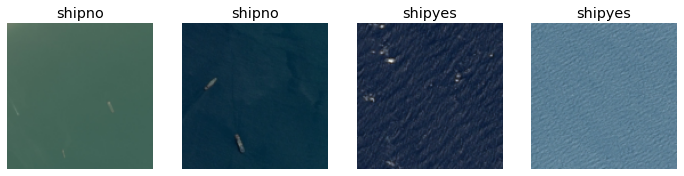

In [128]:
dls.valid.show_batch(max_n=4, nrows=1)

?? Incorrectly labeled data or a bug in my code. some shipno items are NOT correct

### Skip Sections Below. We have a lot of data. So, hopefully no data augmentation

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Data Augmentation

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

## Training Your Model, and Using It to Clean Your Data

In [129]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.602100,0.379722,0.154500,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.342708,0.244840,0.098500,01:07
1,0.212534,0.204538,0.081000,01:06
2,0.100808,0.196125,0.072000,01:06
3,0.039882,0.206908,0.068000,01:05


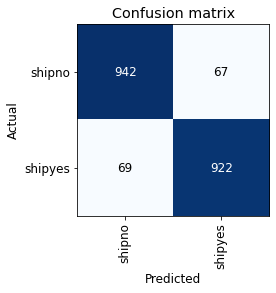

In [130]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

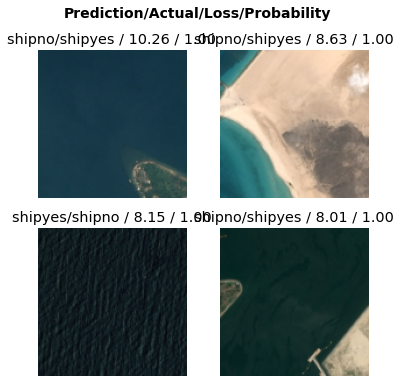

In [132]:
interp.plot_top_losses(4, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpg')

In [ ]:
learn_inf.dls.vocab

### Creating a Notebook App from the Model

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable voila —sys-prefix

### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.